# specutils_demo.ipynb

See https://specutils.readthedocs.io/en/latest/  

specutils requires installation, e.g., using conda.  

As a basic example, consider an emission line galaxy spectrum from the SDSS. We will use this as a proxy for a spectrum you may have downloaded from some archive, or reduced from your own observations.

We begin with some basic imports:

In [1]:
from pylab import *
from astropy.io import fits
from astropy import units as u
import numpy as np
from astropy.visualization import quantity_support
from specutils import Spectrum1D, SpectralRegion
from specutils.fitting import fit_generic_continuum
from specutils.analysis import equivalent_width

In [2]:
quantity_support()  # for getting units on the axes below 

<astropy.visualization.units.quantity_support.<locals>.MplQuantityConverter at 0x1c246d01d0>

Now we load the dataset from its canonical source:

In [3]:
f = fits.open('https://dr16.sdss.org/optical/spectrum/view/data/format=fits/spec=lite?plateid=1323&mjd=52797&fiberid=12')  
# The spectrum is in the second HDU of this file.
specdata = f[1].data 
f.close() 

Then we re-format this dataset into astropy quantities, and create a Spectrum1D object:

In [4]:
lamb = 10**specdata['loglam'] * u.AA 
flux = specdata['flux'] * 1e-17 * u.Unit('erg cm-2 s-1 AA-1') 
spec = Spectrum1D(spectral_axis=lamb, flux=flux) 

And we plot it:

In [5]:
rcParams.update({'font.size': 21})

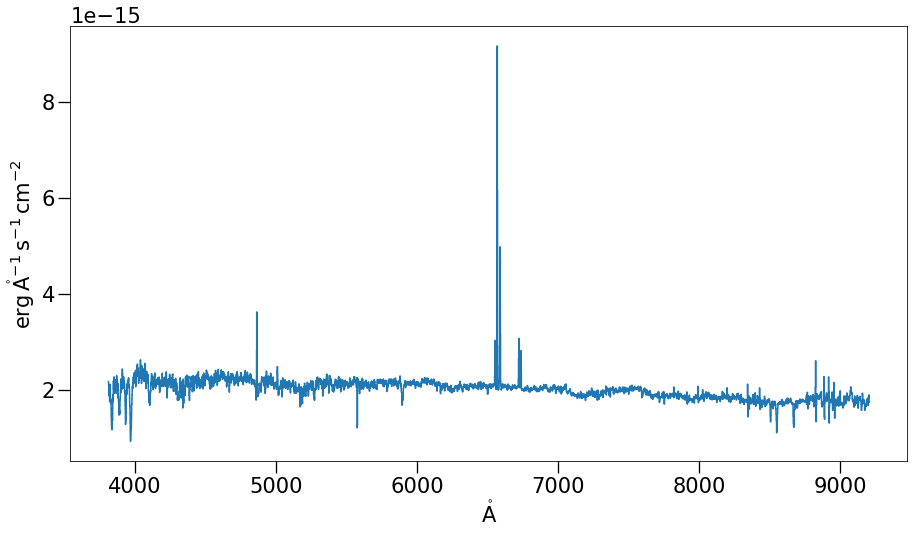

In [6]:
fig1 = figure(figsize=(15,8))
step(spec.spectral_axis, spec.flux) 
tick_params('both', length=12, width=1.3, which='major')

Now maybe you want the equivalent width of a spectral line. That requires normalizing by a continuum estimate:

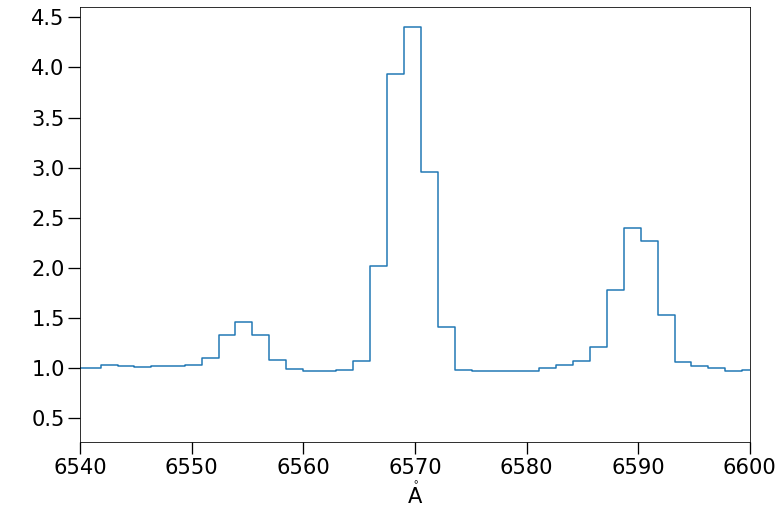

In [7]:
cont_norm_spec = spec / fit_generic_continuum(spec)(spec.spectral_axis) 

fig2 = figure(figsize=(12,8))
step(cont_norm_spec.wavelength, cont_norm_spec.flux)  
xlim(654*u.nm, 660*u.nm)
tick_params('both', length=12, width=1.3, which='major')

But then you can apply a single function over the region of the spectrum containing the line:

In [8]:
equivalent_width(cont_norm_spec, regions=SpectralRegion(6562*u.AA, 6575*u.AA)) 

<Quantity -14.78092438 Angstrom>